<div style="display:fill;
           background-color:#BCEFC6;
           letter-spacing:0.5px;border-bottom: 2px solid black;">
<img src="https://storage.googleapis.com/kaggle-datasets-images/426827/812605/719b66b4a3afd1da8c107b026c66fa91/dataset-cover.jpg?t=2019-11-28-02-30-42">
    
<H1 style="padding: 20px; color:black; font-weight:600;font-family: 'Garamond', 'Lucida Sans', sans-serif; text-align: center; font-size: 36px;">Credit Card Approval Prediction - 2. part</H1>
</div>


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.plotting.register_matplotlib_converters()
import seaborn as sns
sns.set_style("dark") # Theme for plots as Dark
sns.color_palette("flare")
import os
import cv2
# # preprocessing libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
# # machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score , classification_report, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix, precision_recall_curve
# # explainability libraries
from lime import lime_tabular
from alibi.explainers import IntegratedGradients
import shap
import lime
from treeinterpreter import treeinterpreter as ti
# # Load the data
df_merged = pd.read_csv('merged_data.csv')


<div style="background-color: #BCEFC6; padding: 20px; border-radius: 70px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Table of Contents
    </h1>
</div>

<a href="#1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 22px;"> 1. Additions to the previous submission </a><br>
<a href="#1.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 1.1 Handle missing values </a><br>
<a href="#1.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 1.2 Unique values, Duplicates </a><br>
<a href="#1.3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 1.3 Status value based on gender </a><br>
<a href="#1.4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 1.4 Profiling Result </a><br>
<a href="#2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 22px;"> 2. Preprocessing data for training </a><br>
<a href="#2.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 2.1 Replace outliers with median </a><br>
<a href="#2.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 2.2 Standardization and encoding </a><br>
<a href="#3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 22px;"> 3. Feature selection  </a><br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 22px;"> 4. Random Forest Classifier - blackbox-model </a><br>
<a href="#4.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 4.1 Evaluation </a><br>
<a href="#4.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 4.2 Roc & Precision-Recall curve </a><br>
<a href="#4.3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 4.3 Confusion-matrix and Feature importance </a><br>
<a href="#5" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 22px;"> 5. XGBoost model - blackbox-model </a><br>
<a href="#5.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 5.1 Evaluation </a><br>
<a href="#5.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 5.2 Roc & Precision-Recall curve </a><br>
<a href="#5.3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 5.3 Confusion-matrix and Feature importance </a><br>
<a href="#6" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 22px;"> 6. Decision Tree Classifier - whitebox-model </a><br>
<a href="#6.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 6.1 Evaluation </a><br>
<a href="#6.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 6.2 Roc & Precision-Recall curve </a><br>
<a href="#6.3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 6.3 Confusion-matrix and Feature importance </a><br>
<a href="#7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 22px;"> 7. Interpreting the whitebox model </a><br>
<a href="#8" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 22px;"> 8. Explanatory methods for blackbox models (LIME & SHAP) </a><br>
<a href="#8.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 8.1 Random Forest Classifier </a><br>
<a href="#8.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 16px;padding-left: 25px;"> 8.2 XGBoost model </a><br>
<a href="#9" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #578B61;font-size: 22px;"> 9. Summary </a><br>


<div id="1" style="background-color: #BCEFC6; padding: 20px; border-radius: 70px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   1. Additions to the previous submission
    </h1>
</div>


<div id="1.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   1.1 Handle missing values
    </h1>
</div>
<hr>

In [24]:
df_merged.isna().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
DAYS_BIRTH_YEAR             0
dtype: int64

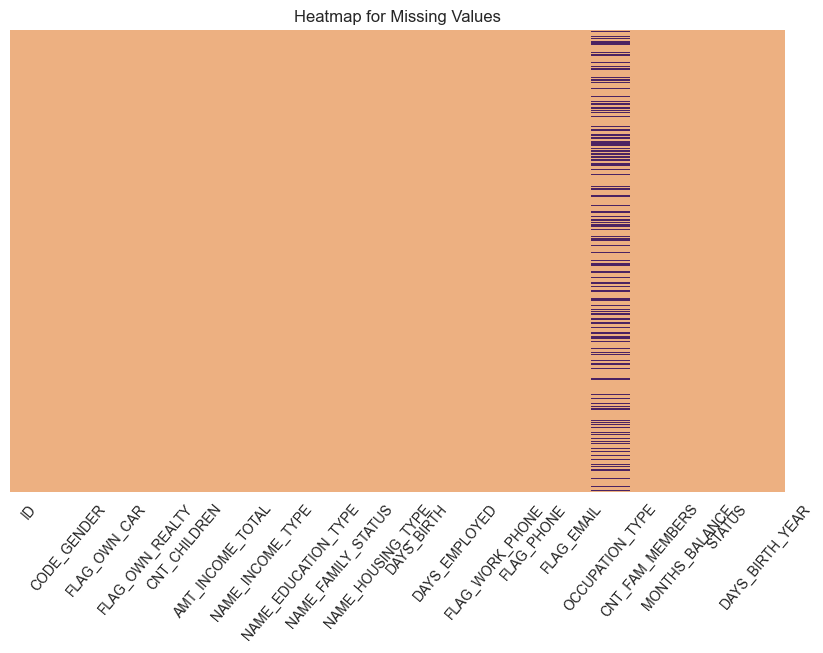

In [25]:
# plotting the heatmap to check for null values

# definig the figure size
plt.figure(figsize=(10, 6))

# plotting the heatmap of missing values
sns.heatmap(df_merged.isna(), cbar=False , yticklabels=False, cmap='flare')

# defining the title
plt.title('Heatmap for Missing Values')
plt.xticks(rotation=50)
plt.show()

In [9]:
# percentage of missing values in `OCCUPATION_TYPE` column
df_merged['OCCUPATION_TYPE'].isna().sum() / df_merged.shape[0] * 100

30.86580559716606

OCCUPATION_TYPE column has 240048 missing values, and it has percentage of 30.86% missing values

In [53]:
# switch nan values to 'Unknown'
df_merged['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

analyze occupation type based on income type

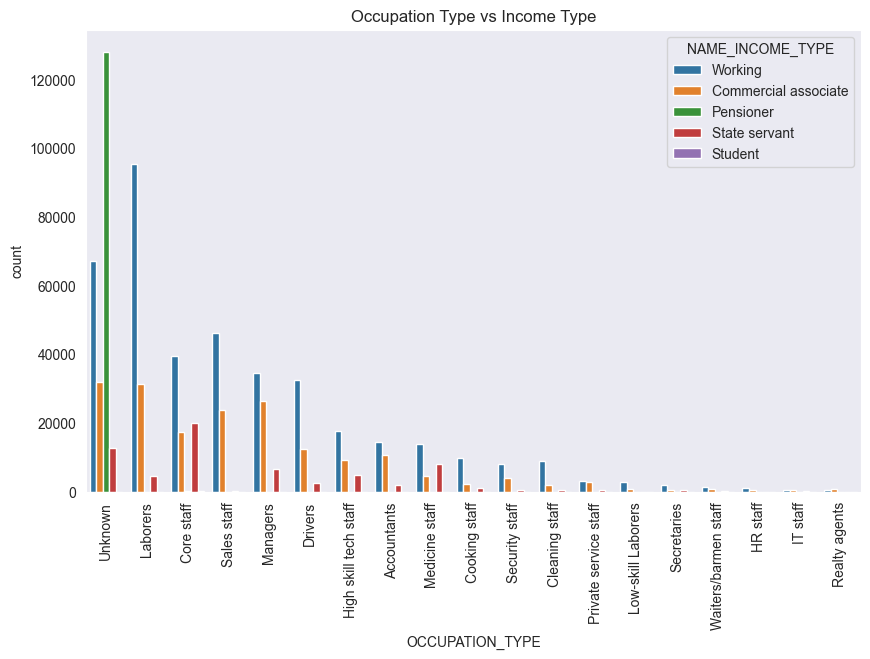

In [27]:
# plot clustered column chart for the occupation type and name_income_type
plt.figure(figsize=(10, 6))
sns.countplot(x='OCCUPATION_TYPE', hue='NAME_INCOME_TYPE', data=df_merged, order=df_merged['OCCUPATION_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Occupation Type vs Income Type')
plt.show()



Most of the missing "unknown" data belong to the pensioner group, so it is worth keeping them.



<div id="1.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   1.2 Unique values, duplicates
    </h1>
</div>
<hr>


In [14]:
df_merged.shape[0]

777715

In [28]:
df_merged.nunique()

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           19
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     4
DAYS_BIRTH_YEAR         7183
dtype: int64

the dataset has 777715 rows but there are only 36457 unique values in the ID column -> duplicates

In [15]:
df_merged.duplicated().sum()

0

In [29]:
df_merged[df_merged['ID'].duplicated()].head(10)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
1   5008804            0             1                1             0   
2   5008804            0             1                1             0   
3   5008804            0             1                1             0   
4   5008804            0             1                1             0   
5   5008804            0             1                1             0   
6   5008804            0             1                1             0   
7   5008804            0             1                1             0   
8   5008804            0             1                1             0   
9   5008804            0             1                1             0   
10  5008804            0             1                1             0   

    AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
1           427500.0          Working    Higher education     Civil marriage   
2           427500.0          Working    Higher education     Civil marriage   
3           427500.0          Working    Higher education     Civil marriage   
4           427500.0          Working    Higher education     Civil marriage   
5           427500.0          Working    Higher education     Civil marriage   
6           427500.0          Working    Higher education     Civil marriage   
7           427500.0          Working    Higher education     Civil marriage   
8           427500.0          Working    Higher education     Civil marriage   
9           427500.0          Working    Higher education     Civil marriage   
10          427500.0          Working    Higher education     Civil marriage   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  \
1   Rented apartment      -12005          -4542                1           0   
2   Rented apartment      -12005          -4542                1           0   
3   Rented apartment      -12005          -4542                1           0   
4   Rented apartment      -12005          -4542                1           0   
5   Rented apartment      -12005          -4542                1           0   
6   Rented apartment      -12005          -4542                1           0   
7   Rented apartment      -12005          -4542                1           0   
8   Rented apartment      -12005          -4542                1           0   
9   Rented apartment      -12005          -4542                1           0   
10  Rented apartment      -12005          -4542                1           0   

    FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  \
1            0         Unknown              2.0              -1      C   
2            0         Unknown              2.0              -2      C   
3            0         Unknown              2.0              -3      C   
4            0         Unknown              2.0              -4      C   
5            0         Unknown              2.0              -5      C   
6            0         Unknown              2.0              -6      C   
7            0         Unknown              2.0              -7      C   
8            0         Unknown              2.0              -8      C   
9            0         Unknown              2.0              -9      C   
10           0         Unknown              2.0             -10      C   

    DAYS_BIRTH_YEAR  
1         32.890411  
2         32.890411  
3         32.890411  
4         32.890411  
5         32.890411  
6         32.890411  
7         32.890411  
8         32.890411  
9         32.890411  
10        32.890411

In [30]:
df_merged[df_merged['ID'].duplicated()].tail(20)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
777694  5150049            1             0                1             0   
777695  5150049            1             0                1             0   
777696  5150049            1             0                1             0   
777697  5150049            1             0                1             0   
777698  5150049            1             0                1             0   
777699  5150049            1             0                1             0   
777700  5150049            1             0                1             0   
777702  5150337            0             0                1             0   
777703  5150337            0             0                1             0   
777704  5150337            0             0                1             0   
777705  5150337            0             0                1             0   
777706  5150337            0             0                1             0   
777707  5150337            0             0                1             0   
777708  5150337            0             0                1             0   
777709  5150337            0             0                1             0   
777710  5150337            0             0                1             0   
777711  5150337            0             0                1             0   
777712  5150337            0             0                1             0   
777713  5150337            0             0                1             0   
777714  5150337            0             0                1             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
777694          283500.0          Working  Secondary / secondary special   
777695          283500.0          Working  Secondary / secondary special   
777696          283500.0          Working  Secondary / secondary special   
777697          283500.0          Working  Secondary / secondary special   
777698          283500.0          Working  Secondary / secondary special   
777699          283500.0          Working  Secondary / secondary special   
777700          283500.0          Working  Secondary / secondary special   
777702          112500.0          Working  Secondary / secondary special   
777703          112500.0          Working  Secondary / secondary special   
777704          112500.0          Working  Secondary / secondary special   
777705          112500.0          Working  Secondary / secondary special   
777706          112500.0          Working  Secondary / secondary special   
777707          112500.0          Working  Secondary / secondary special   
777708          112500.0          Working  Secondary / secondary special   
777709          112500.0          Working  Secondary / secondary special   
777710          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   
777712          112500.0          Working  Secondary / secondary special   
777713          112500.0          Working  Secondary / secondary special   
777714          112500.0          Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
777694               Married  House / apartment      -17958           -655   
777695               Married  House / apartment      -17958           -655   
777696               Married  House / apartment      -17958           -655   
777697               Married  House / apartment      -17958           -655   
777698               Married  House / apartment      -17958           -655   
777699               Married  House / apartment      -17958           -655   
777700               Married  House / apartment      -17958           -655   
777702  Single / not married   Rented apartment       -9188          -1193   
777703  Single / not married   Rented apartment       -9188          -1193   
777704  Single / n

there is no duplicates, the data is collected in different months (MONTHS_BALANCE)

<div id="1.3" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   1.3 Status value based on gender
    </h1>
</div>
<hr>

In [31]:

df_merged['STATUS'].value_counts()
# status: 
# 0: 1-29 days past due 
# L: more then 30 days past due
# C: paid off that month 
# X: No loan for the month

STATUS
C    329536
0    290654
X    145950
L     11575
Name: count, dtype: int64

Most of the clients in our dataset have paid off their loan for that month

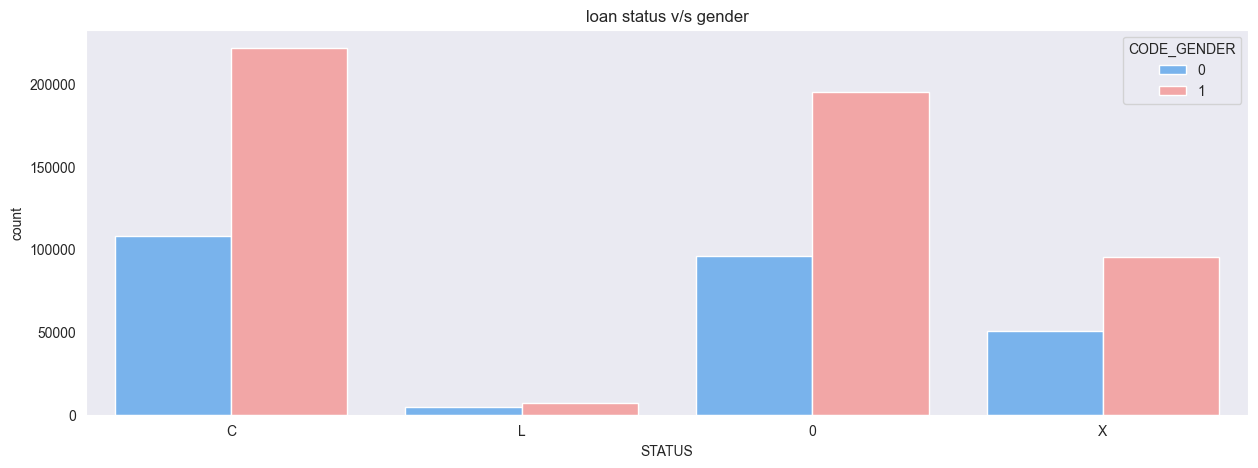

In [32]:
# checking the relationship between loan status and gender

# defining the figure size
plt.figure(figsize=(15, 5))

# plotting the countplot
sns.countplot(data=df_merged, x=df_merged['STATUS'], hue=df_merged['CODE_GENDER'], palette=['#66b3ff','#ff9999'])

# defining the tilte
plt.title('loan status v/s gender')
# rotating the x-axis labels

plt.show()

In [33]:
# value count of loan status v/s gender
filtered_loan = df_merged.groupby('STATUS')['CODE_GENDER'].value_counts()

# filtering the values less than 10000
filtered_loan.unstack()

CODE_GENDER       0       1
STATUS                     
0             95692  194962
C            108080  221456
L              4420    7155
X             50672   95278

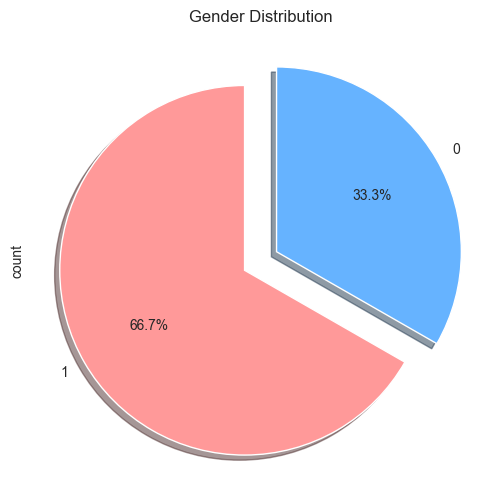

In [34]:
# plot the percentage of VALUES in CODE_GENDER in the dataset
plt.figure(figsize=(10, 6))

# plot the pie chart
df_merged['CODE_GENDER'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.1, 0.1], colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()


the females have more over due than males, but there is more female in the dataset.

In [35]:
# the sum of the gender
gender_sum = df_merged[df_merged['CODE_GENDER']==1]
gender_sum.shape[0] # 518851 women

# get the weighted average of the loan status by gender
loan_status = df_merged
loan_status['count'] = 1
loan_status = loan_status.groupby(['CODE_GENDER', 'STATUS'])['count'].sum().reset_index()

loan_status = loan_status.pivot(index='STATUS', columns='CODE_GENDER', values='count')
loan_status = loan_status.fillna(0)

# Weighted average
loan_status[0] = loan_status[0]/33.3 * 50
loan_status[1] = loan_status[1]/66.6 * 50
loan_status




CODE_GENDER              0              1
STATUS                                   
0            143681.681682  146367.867868
C            162282.282282  166258.258258
L              6636.636637    5371.621622
X             76084.084084   71530.030030

Men have more "bad debt" on average. (L)
Women have more overall debt on average. (L+0)

<div id="1.4" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   1.4 Profiling Result
    </h1>
</div>
<hr>

score_report.csv

- records users' behaviors of credit card.
- the dataset do not contains duplicates
- number of variables: 3
- number of observations: 1048575
- STATUS refers to the target variable
- there is numeric and categorical values
- MONTHS_BALANCE contains zeros - The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

record_report.csv

- contains appliers personal information, which you could use as features for predicting.
- the dataset do not contains duplicates
- number of variables: 18
- number of observations: 438557 (134203 missing cells in case "OCCUPATION_TYPE")
- there is numeric, categorical and boolean values
- FLAG_MOBIL feature has constant value - drop irrelevant feature
- CNT_CHILDREN contains zeros - zero value indicates that the consumer has no children
- highly imbalanced features must be managed 
- observation: children count could be greater than count of family members, maybe they do not live with parents.

In [54]:
# data where CNT_CHILDREN is greater than CNT_FAM_MEMBERS
df_merged[df_merged['CNT_CHILDREN'] > df_merged['CNT_FAM_MEMBERS']].head(10)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
769262  5023641            0             1                0             2   
769263  5023641            0             1                0             2   
769264  5023641            0             1                0             2   
769265  5023641            0             1                0             2   
769266  5023641            0             1                0             2   
769267  5023641            0             1                0             2   
769268  5023641            0             1                0             2   
769269  5023641            0             1                0             2   
769270  5023641            0             1                0             2   
769271  5023641            0             1                0             2   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
769262          225000.0          Working  Secondary / secondary special   
769263          225000.0          Working  Secondary / secondary special   
769264          225000.0          Working  Secondary / secondary special   
769265          225000.0          Working  Secondary / secondary special   
769266          225000.0          Working  Secondary / secondary special   
769267          225000.0          Working  Secondary / secondary special   
769268          225000.0          Working  Secondary / secondary special   
769269          225000.0          Working  Secondary / secondary special   
769270          225000.0          Working  Secondary / secondary special   
769271          225000.0          Working  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
769262            Married  House / apartment      -14776          -2212   
769263            Married  House / apartment      -14776          -2212   
769264            Married  House / apartment      -14776          -2212   
769265            Married  House / apartment      -14776          -2212   
769266            Married  House / apartment      -14776          -2212   
769267            Married  House / apartment      -14776          -2212   
769268            Married  House / apartment      -14776          -2212   
769269            Married  House / apartment      -14776          -2212   
769270            Married  House / apartment      -14776          -2212   
769271            Married  House / apartment      -14776          -2212   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
769262                0           0           0         Drivers   
769263                0           0           0         Drivers   
769264                0           0           0         Drivers   
769265                0           0           0         Drivers   
769266                0           0           0         Drivers   
769267                0           0           0         Drivers   
769268                0           0           0         Drivers   
769269                0           0           0         Drivers   
769270                0           0           0         Drivers   
769271                0           0           0         Drivers   

        CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  DAYS_BIRTH_YEAR  
769262              1.0               0      C        40.482192  
769263              1.0              -1      C        40.482192  
769264              1.0              -2      C        40.482192  
769265              1.0              -3      C        40.482192  
769266              1.0              -4      C        40.482192  
769267              1.0              -5      C        40.482192  
769268              1.0              -6      C        40.482192  
769269              1.0              -7      C        40.482192  
769270              1.0              -8      C        40.482192  
769271              1.0              -9      C        40.482192

Records are connected by ID

<div id="2" style="background-color: #BCEFC6; padding: 20px; border-radius: 70px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   2. Preprocess data for training
    </h1>
</div>

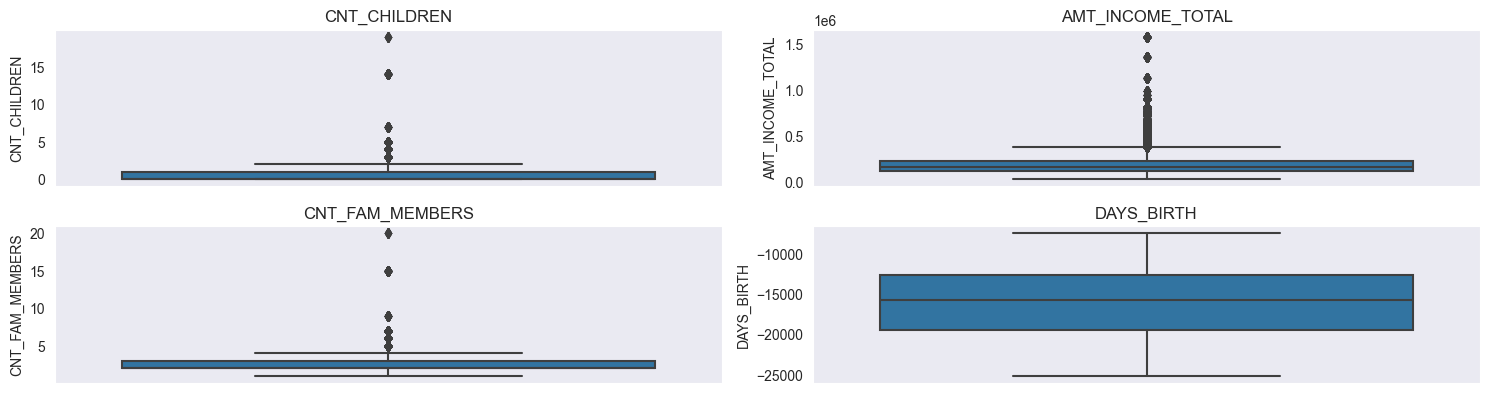

In [41]:
# checking the relationship between loan_status and income

# filtering the list of specific columns    
col = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS','DAYS_BIRTH' ]

# defining the figure size
plt.figure(figsize=(15, 6))

# plotting the countplot using for loop
for i in range(len(col)):
    plt.subplot(3, 2, i+1)
    plt.title(col[i])  # Use the column name as the title
    sns.boxplot(data=df_merged, y=col[i])

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

<div id="2.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   2.1 Replace outliers with median
    </h1>
</div>
inspired by: https://www.kaggle.com/code/akmal1995/credit-crad-risk-analysis-eda-random-forest
<hr>

In [3]:
# removing outliers
col = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS' ]
# for loop to remove outliers
for i in range(len(col)):
    # calculating the first and third quartile
    q1 = df_merged[col[i]].quantile(0.25)
    q3 = df_merged[col[i]].quantile(0.75)
    # calculating the interquartile range
    iqr = q3 - q1
    # calculating the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # replacing the outliers with the median
    df_merged[col[i]] = np.where((df_merged[col[i]] >= upper_bound) | (df_merged[col[i]] <= lower_bound), df_merged[col[i]].median() , df_merged[col[i]])

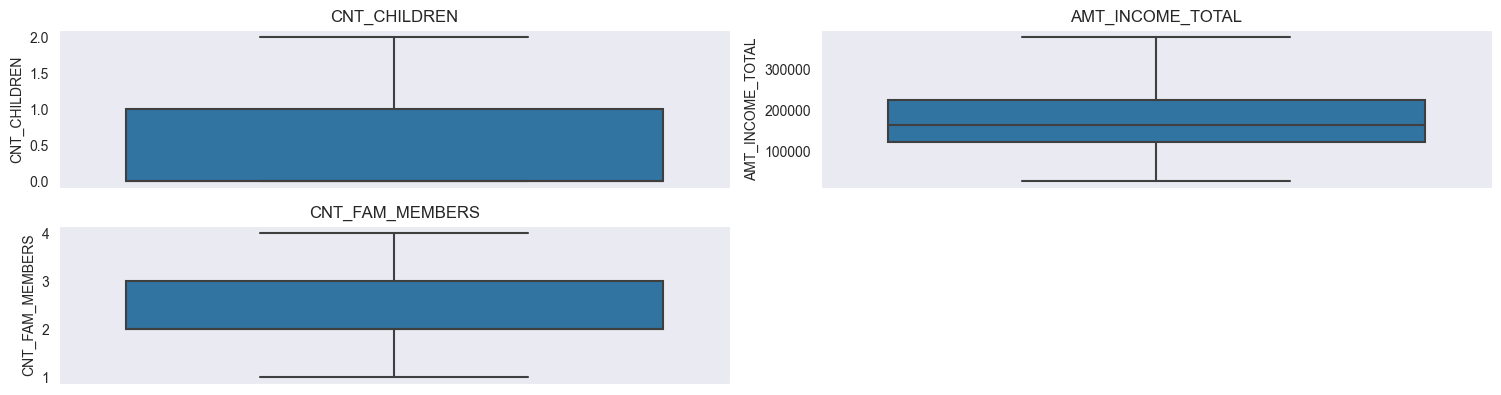

In [43]:
# plot after removing the outliers  
# defining the figure size
plt.figure(figsize=(15, 6))

# plotting the countplot using for loop
for i in range(len(col)):
    plt.subplot(3, 2, i+1)
    plt.title(col[i])  # Use the column name as the title
    sns.boxplot(data=df_merged, y=col[i])

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

<div id="2.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   2.2 Standardization and encoding
    </h1>
</div>
inspired by: https://www.kaggle.com/code/akmal1995/credit-crad-risk-analysis-eda-random-forest
<hr>

In [4]:
col = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS','DAYS_BIRTH' ]
sc = StandardScaler()
for i in col:
    df_merged[i] = sc.fit_transform(df_merged[[i]])

In [5]:
# filtering the list of specific columns which we need to encode
col = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE']

# calling the label encoder
le = LabelEncoder()

# for loop to encode the specific columns
for i in col:
    df_merged[i] =le.fit_transform(df_merged[i] )

In [6]:
# replacing the values of `STATUS` column
df_merged['STATUS'].replace(['C', 'X','0'], 0, inplace=True)
df_merged['STATUS'].replace(['L'], 1, inplace=True)

# bad debt = 1
# good debt = 0

In [49]:
df_merged.dtypes

ID                       int64
CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE         int32
NAME_EDUCATION_TYPE      int32
NAME_FAMILY_STATUS       int32
NAME_HOUSING_TYPE        int32
DAYS_BIRTH             float64
DAYS_EMPLOYED            int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE          int32
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE           int64
STATUS                   int64
DAYS_BIRTH_YEAR        float64
dtype: object

<div id="3" style="background-color: #BCEFC6; padding: 20px; border-radius: 70px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   3. Feature selection
    </h1>
</div>

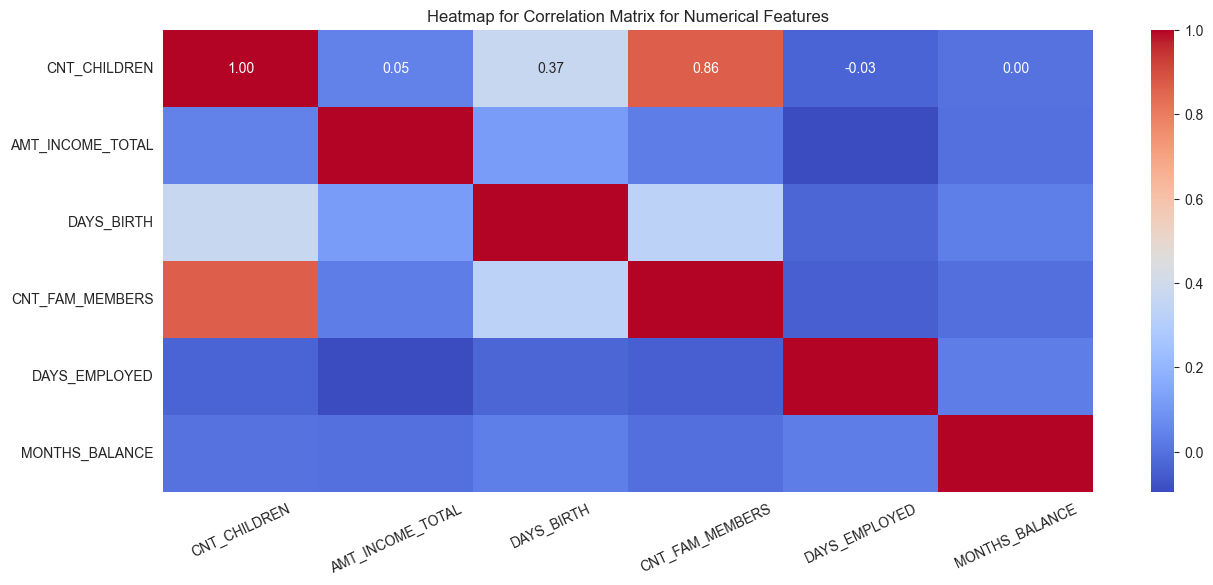

In [50]:
# correlation matrix

# defining the figure size
plt.figure(figsize=(15, 6))
# plotting the heatmap
sns.heatmap(df_merged[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED','MONTHS_BALANCE']].corr(), annot=True, cmap='coolwarm', fmt='.2f') 
# defining the title and rotation of x-axis labels
plt.xticks(rotation=25)
plt.title('Heatmap for Correlation Matrix for Numerical Features')
plt.show()

children and family_members are highly correlated with each other

#### Multicollinearity


In [120]:

# Drop 'loan_status' and 'status' columns from col
col = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS'], axis=1) # Assume that col is our independent variable

# Compute variance inflation factor

# Create a dataframe to store the VIF
factor  = pd.DataFrame(columns=["VIF", "Features"] )
# For each column, compute the VIF
factor["Features"] = col.columns
factor["VIF"] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]

# Display the results
factor

VIF             Features
0   29.523626                   ID
1    3.752733          CODE_GENDER
2    1.987353         FLAG_OWN_CAR
3    3.192310      FLAG_OWN_REALTY
4    1.149112     AMT_INCOME_TOTAL
5    3.280424     NAME_INCOME_TYPE
6    6.793458  NAME_EDUCATION_TYPE
7    3.203076   NAME_FAMILY_STATUS
8    3.082476    NAME_HOUSING_TYPE
9    1.301671           DAYS_BIRTH
10   2.115784        DAYS_EMPLOYED
11   1.606100      FLAG_WORK_PHONE
12   1.607102           FLAG_PHONE
13   1.132255           FLAG_EMAIL
14   5.399079      OCCUPATION_TYPE
15   2.900593       MONTHS_BALANCE

Multicollinearity occurs when two or more predictor variables in the model are highly correlated.
I dropped the CNT_CHILDREN and CNT_FAM_MEMBERS and DAYS_BIRTH_YEAR from independent variable list to get best results from models.


In [7]:
X = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis = 1) # Assume that X is our independent variable

y = df_merged['STATUS'] # Assume that y is our dependent variable

In [8]:
print(f'The shpape of X ={X.shape} \n') # checking the shape of X

print(f'The shape of y ={y.shape}') # checking the shape of y

The shpape of X =(777715, 15) 

The shape of y =(777715,)


### Train-test split

In [9]:
# 1. case
# splitting the dataset into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 80% training and 20% testing


# 2. case
smote = SMOTE()
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

#### In the first case, I don't use SMOTE and don't handle skew, but the STATUS values highly imbalanced -> the models predicted all data to "good debt", which resulted in a very low f1 score

In [10]:
# Skew function of Pandas
old_skew = df_merged.skew().sort_values(ascending=False)
old_skew
# status highly skewed

STATUS                 8.012775
NAME_HOUSING_TYPE      3.412802
FLAG_EMAIL             2.830028
CNT_CHILDREN           1.456782
NAME_FAMILY_STATUS     1.373716
FLAG_WORK_PHONE        1.271030
FLAG_PHONE             0.867866
AMT_INCOME_TOTAL       0.674994
CNT_FAM_MEMBERS        0.625618
FLAG_OWN_CAR           0.445233
DAYS_BIRTH_YEAR        0.176931
ID                     0.073626
DAYS_BIRTH            -0.176931
OCCUPATION_TYPE       -0.212703
NAME_INCOME_TYPE      -0.295585
MONTHS_BALANCE        -0.598674
FLAG_OWN_REALTY       -0.673443
CODE_GENDER           -0.709407
NAME_EDUCATION_TYPE   -0.834933
DAYS_EMPLOYED         -1.692496
dtype: float64

#### Make the data more Gaussian-like

In [11]:
# PowerTransformer
power = PowerTransformer(method='yeo-johnson')
X_train = power.fit_transform(X_train)
X_test = power.transform(X_test)

<div id="4" style="background-color: #BCEFC6; padding: 20px; border-radius: 70px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   4. Random Forest Classifier - blackbox-model
    </h1>
</div>

In [11]:
# instantiating the model
model = RandomForestClassifier()
# fitting the model
model.fit(X_train, y_train )

RandomForestClassifier()

In [60]:
# making predictions on the test set
y_pred = model.predict(X_test)
# creating a dataframe to compare the actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)

Actual  Predicted
203911        0          0
1403811       1          1
371337        0          0
112282        0          0
1376714       1          1
848521        1          1
392274        0          0
661882        0          0
110617        0          0
1144671       1          1

<div id="4.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   4.1 Evaluation
    </h1>
</div>
<hr>

In [61]:
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)*100:.2f} %')
print(f"Precision Score : {precision_score(y_test, y_pred , average = 'micro'):.2f}")
print(f"F1-Score : {f1_score(y_test, y_pred , average='micro')}")

Accuracy Score : 97.10 %
Precision Score : 0.97
F1-Score : 0.9710431513822539


In [62]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    153355
           1       0.96      0.99      0.97    153101

    accuracy                           0.97    306456
   macro avg       0.97      0.97      0.97    306456
weighted avg       0.97      0.97      0.97    306456



<div id="4.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   4.2 Roc & Precision-Recall curve
    </h1>
</div>
<hr>

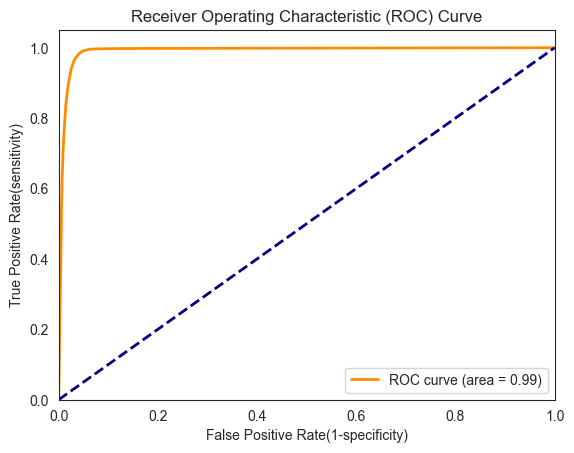

In [75]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(1-specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


ROC curve close to the top-left corner indicate better performance.
The AUC indicates that the model being evaluated has very good discriminative ability to distinguish between positive and negative classes.

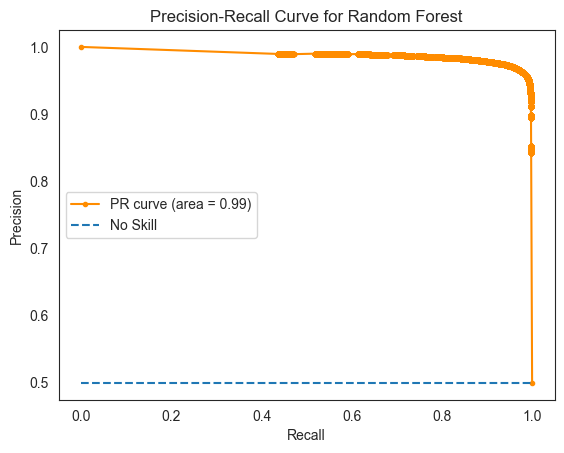

In [84]:

# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
# Calculate AUC
pr_auc = auc(recall, precision)
plt.figure()
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % pr_auc, color='darkorange')
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
# show the legend
plt.legend()
# show the plot
plt.show()



PR curve indicates, that the model produces few false negatives, and false positives

The high AUC value of 0.99 suggests that the model performs well in distinguishing between classes.

<div id="4.3" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   4.3 Confusion-matrix and Feature importance
    </h1>
</div>
<hr>

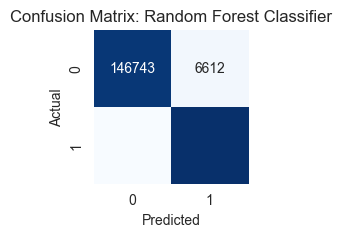

In [76]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(2, 2))
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

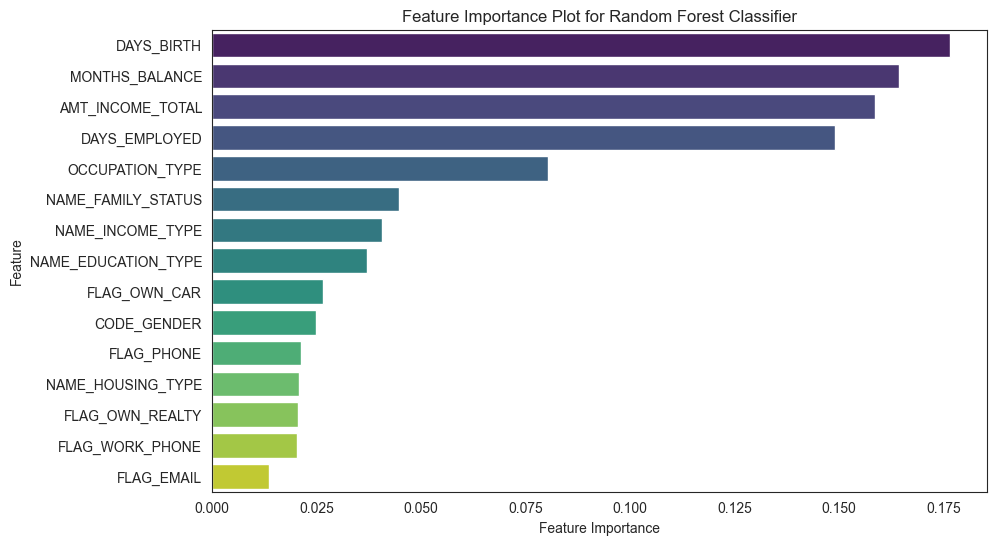

In [77]:
feat_importances = model.feature_importances_
col = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis=1)
# Create a pandas Series with feature importances
feat_importances_series = pd.Series(feat_importances, index=col.columns)

# Sort feature importances in descending order
feat_importances_series = feat_importances_series.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances_series.values, y=feat_importances_series.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot for Random Forest Classifier')
plt.show()

The most important global features: DAYS_BIRTH, MONTHS_BALANCE, AMT_INCOME_TOTAL, DAYS_EMPLOYED ...

In [74]:
# Local interpretation provides insights into the impact of individual feature values.
# test = X[180:181]
# for i, row in test.iterrows():
#     # Create a DataFrame from the row with the correct column names
#     data_point = pd.DataFrame([row], columns=test.columns)
    
#     # Perform the prediction
#     prediction, bias, contributions = ti.predict(model, data_point)
    
#     # Create a DataFrame for contributions
#     contributions_df = pd.DataFrame([round(c[1], 3) for c in contributions[0]], 
#                                     index=test.columns, 
#                                     columns=['contribution_variable'])
    
#     # Transpose data_point to have it in the same format as contributions_df
#     data_point = data_point.T
    
#     # Add contributions_df to data_point
#     local_interpretation = pd.concat([data_point, contributions_df], axis=1)
    
    
#     # Sort by 'contribution_variable'
#     local_interpretation = local_interpretation.sort_values(by='contribution_variable', ascending=False)
    
#     # If you want to print the local interpretation
#     print(local_interpretation)

                           180  contribution_variable
FLAG_OWN_CAR          0.000000                  0.014
FLAG_PHONE            0.000000                  0.011
FLAG_WORK_PHONE       0.000000                 -0.002
FLAG_EMAIL            0.000000                 -0.006
DAYS_EMPLOYED         0.000000                 -0.009
NAME_EDUCATION_TYPE   1.000000                 -0.017
NAME_HOUSING_TYPE     1.000000                 -0.020
AMT_INCOME_TOTAL      1.559184                 -0.023
OCCUPATION_TYPE      17.000000                 -0.023
CODE_GENDER           1.000000                 -0.030
DAYS_BIRTH           -1.544493                 -0.030
NAME_FAMILY_STATUS    2.000000                 -0.037
FLAG_OWN_REALTY       1.000000                 -0.042
NAME_INCOME_TYPE      1.000000                 -0.075
MONTHS_BALANCE      -10.000000                 -0.120


<div id="5" style="background-color: #BCEFC6; padding: 20px; border-radius: 70px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   5. XGBoost model - blackbox-model
    </h1>
</div>

In [12]:
# XGB Classifier
model2 =  XGBClassifier()
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<div id="5.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   5.1 Evaluation
    </h1>
</div>
<hr>

In [79]:

print(" XGB Train Accuracy = " ,model2.score(X_train, y_train))
y_predict = model2.predict(X_test)
print(" XGB Test Accuracy = " , accuracy_score(y_test, y_predict))
print("F1 = " , f1_score(y_test, y_predict))

 XGB Train Accuracy =  0.8947516119769233
 XGB Test Accuracy =  0.893146161276007
F1 =  0.8921984975079174


in the first case F1: 0.15
- low F1 score indicates imbalance in target class, which leading to a model that predicts very well for the majority class but poorly for the minority class.

second case F1 : 0.89 (after SMOTE and "Gaussian-like")



In [80]:
      
print('\nClassification report:')      
print(classification_report(y_test, y_predict))


Classification report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    153355
           1       0.90      0.89      0.89    153101

    accuracy                           0.89    306456
   macro avg       0.89      0.89      0.89    306456
weighted avg       0.89      0.89      0.89    306456



<div id="5.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   5.2 Roc & Precision-Recall curve
    </h1>
</div>
<hr>

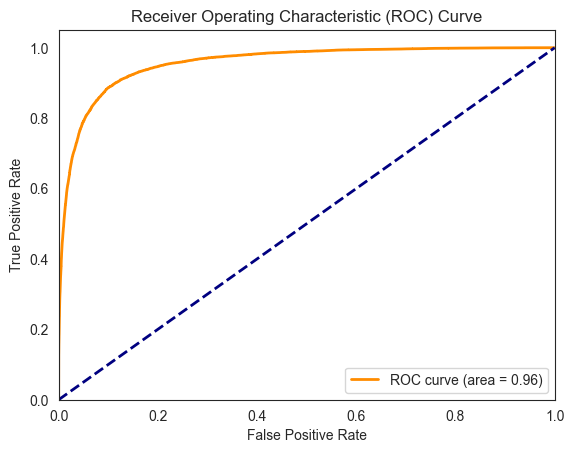

In [81]:
# Assuming model2 is your trained classification model
# Assuming x_test and y_test are your test features and labels, respectively

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(1-specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

first case: XGBoost give points lying along the diagonal - less accurate test

second case: XGBoost is closer to the top-left corner - better performance

The AUC indicates that the model being evaluated has very good discriminative ability to distinguish between positive and negative classes.

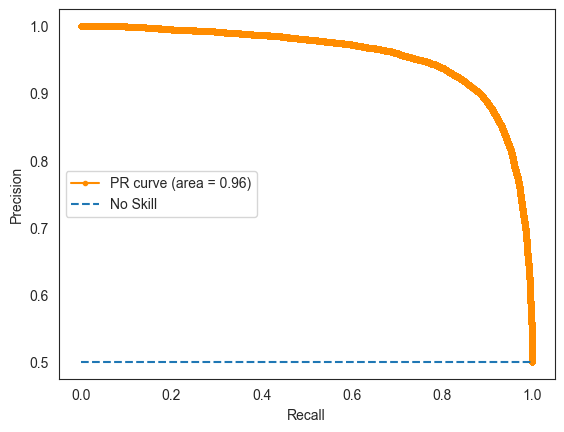

In [83]:

# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model2.predict_proba(X_test)[:, 1])
plt.figure()
pr_auc = auc(recall, precision)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % pr_auc, color='darkorange')
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGB Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()

The high AUC value of 0.96 suggests that the model performs well in distinguishing between classes.

<div id="5.3" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   5.3 Confusion-matrix and Feature importance
    </h1>
</div>
<hr>

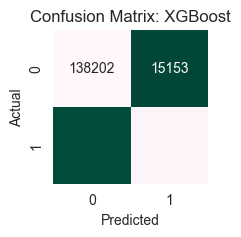

In [86]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(2,2))
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBuGn_r', cbar=False)
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

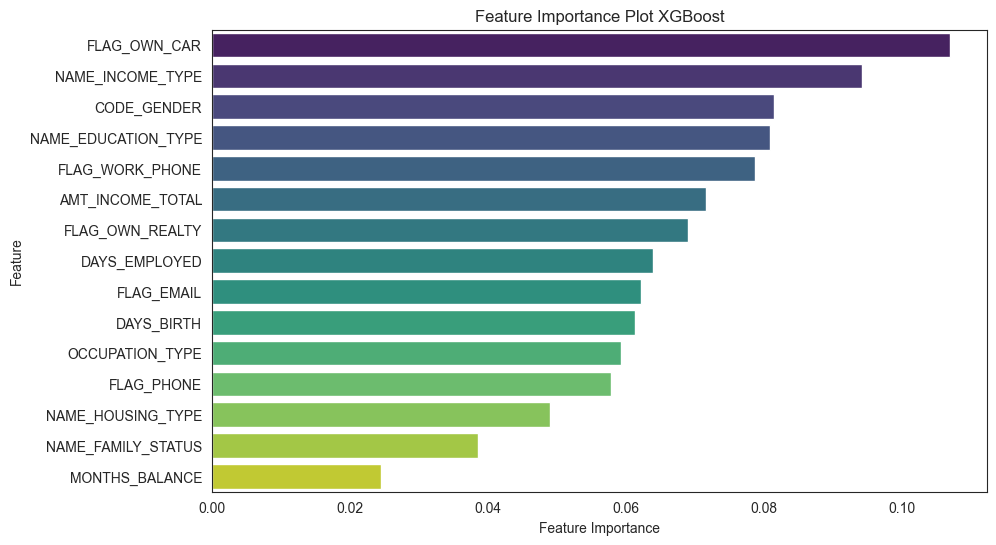

In [87]:
feat_importances = model2.feature_importances_
col = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis=1)
# Create a pandas Series with feature importances
feat_importances_series = pd.Series(feat_importances, index=col.columns)

# Sort feature importances in descending order
feat_importances_series = feat_importances_series.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances_series.values, y=feat_importances_series.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot XGBoost')
plt.show()

The most important global features: FLAG_OWN_CAR, NAME_INCOME_TYPE, CODE_GENDER, NAME_EDUCATION_TYPE ...

<div id="6" style="background-color: #BCEFC6; padding: 20px; border-radius: 70px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   6. Decision-tree - whitebox-model
    </h1>
</div>

In [18]:
# first case max_depth = 15 - hard to visualize, but reach better results:
# accuracy = 0.8662
# precision = 0.87
# f1 = 0.866

# Create and fit the model
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt.fit(X_train, y_train)

# Make predictions
predictions = model_dt.predict(X_test)


In [19]:
# Create and fit the model
model_dt_8 = DecisionTreeClassifier(max_depth=8, random_state=42)
model_dt_8.fit(X_train, y_train)

# Make predictions
predictions_8 = model_dt_8.predict(X_test)

<div id="6.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   6.1 Evaluation 
    </h1>
</div>
<hr>

In [20]:
print("max depth = 3")
print(f"Precision Score : {precision_score(y_test, predictions , average = 'micro'):.2f}")
print(f'Accuracy Score : {accuracy_score(y_test, predictions)*100:.2f} %')
print(f"F1-Score : {f1_score(y_test, predictions , average='micro')}")
print("max depth = 8")
print(f"Precision Score : {precision_score(y_test, predictions_8 , average = 'micro'):.2f}")
print(f'Accuracy Score : {accuracy_score(y_test, predictions_8)*100:.2f} %')
print(f"F1-Score : {f1_score(y_test, predictions_8 , average='micro')}")

max depth = 3
Precision Score : 0.59
Accuracy Score : 59.44 %
F1-Score : 0.594421385125434
max depth = 8
Precision Score : 0.69
Accuracy Score : 69.42 %
F1-Score : 0.6941518521419062


In [100]:
# classification report
print('\nClassification report:')      
print(classification_report(y_test, predictions))


Classification report:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60    153355
           1       0.60      0.58      0.59    153101

    accuracy                           0.60    306456
   macro avg       0.60      0.60      0.60    306456
weighted avg       0.60      0.60      0.60    306456



In [21]:
# classification report
print('\nClassification report:')      
print(classification_report(y_test, predictions_8))


Classification report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71    153355
           1       0.72      0.64      0.68    153101

    accuracy                           0.69    306456
   macro avg       0.70      0.69      0.69    306456
weighted avg       0.70      0.69      0.69    306456



<div id="6.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   6.2 Roc & Precision-Recall curve
    </h1>
</div>
<hr>

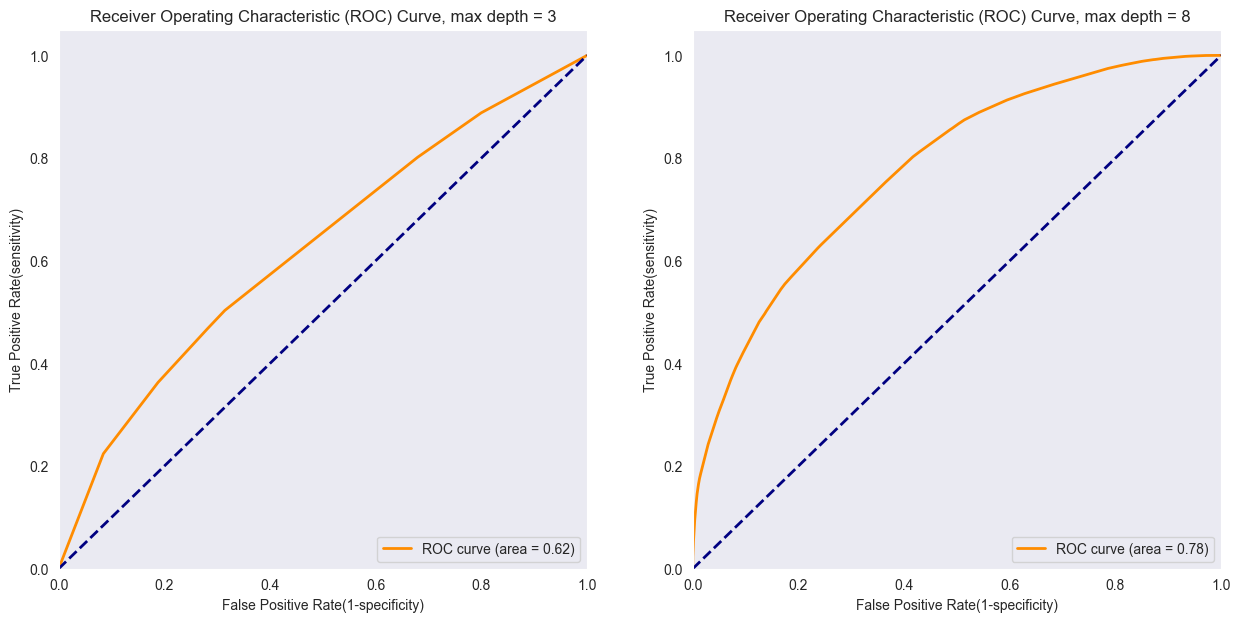

In [27]:
# Assuming model2 is your trained classification model
# Assuming x_test and y_test are your test features and labels, respectively

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model_dt.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(15, 7))
# Plot ROC curve
plt.subplot(1, 2, 1)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(1-specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve, max depth = 3')
plt.legend(loc="lower right")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model_dt_8.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(1-specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve, max depth = 8')
plt.legend(loc="lower right")

plt.show()

The ROC curve (left) is closer to the diagonal, which indicates, that the model not predict really well compared to the blackbox models. However, reached better performance compared to a random classifier.
The model (right) predict better compared to the left models, due to the higher max depth value

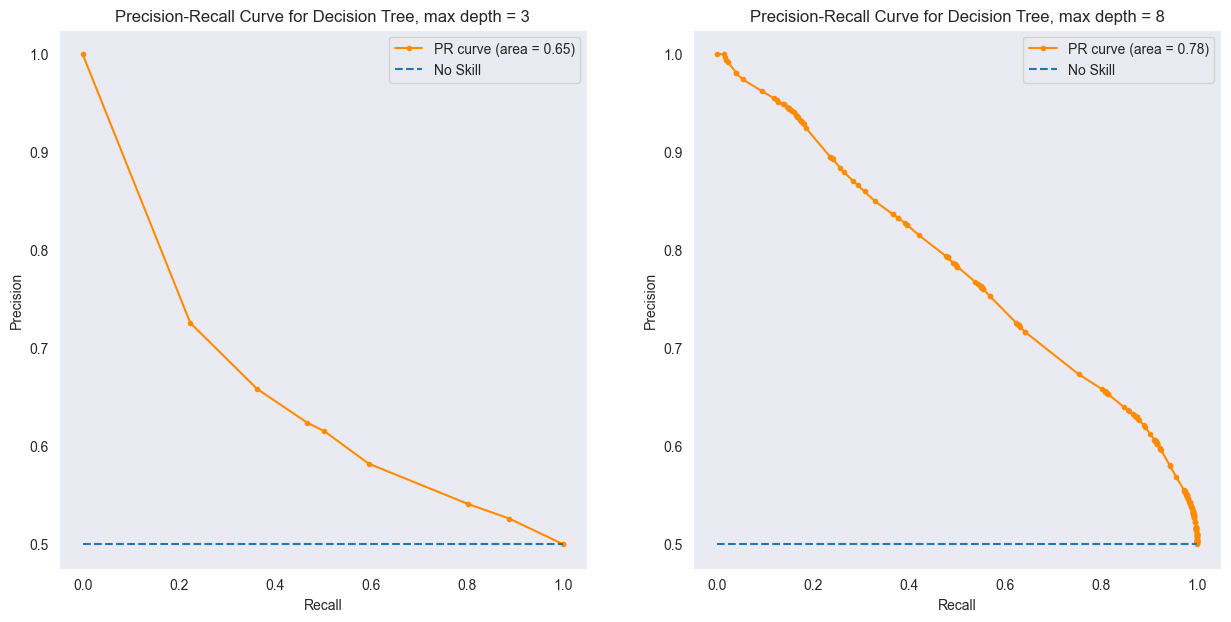

In [28]:

# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model_dt.predict_proba(X_test)[:, 1])

plt.figure(figsize=(15, 7))
# Plot ROC curve
plt.subplot(1, 2, 1)
pr_auc = auc(recall, precision)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % pr_auc, color='darkorange')
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree, max depth = 3')
# show the legend
plt.legend()

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model_dt_8.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.subplot(1, 2, 2)
pr_auc = auc(recall, precision)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % pr_auc, color='darkorange')
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree, max depth = 8')
# show the legend
plt.legend()

# show the plot
plt.show()

PR curves show that the models overall performances much lower than in case of blackbox models. Better results can be achieved by increasing the depth.
The model (right) reached better results.

<div id="6.3" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   6.3 Confusion-matrix and Feature importance
    </h1>
</div>
<hr>

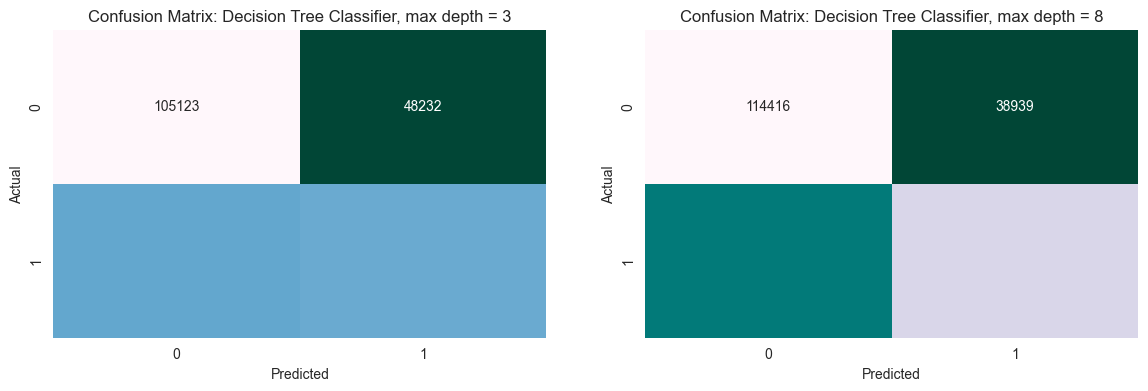

In [32]:

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBuGn_r', cbar=False)
plt.title('Confusion Matrix: Decision Tree Classifier, max depth = 3')
plt.xlabel('Predicted')
plt.ylabel('Actual')

conf_matrix = confusion_matrix(y_test, predictions_8)
plt.subplot(1, 2, 2)
sns.set_style('white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBuGn_r', cbar=False)
plt.title('Confusion Matrix: Decision Tree Classifier, max depth = 8')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

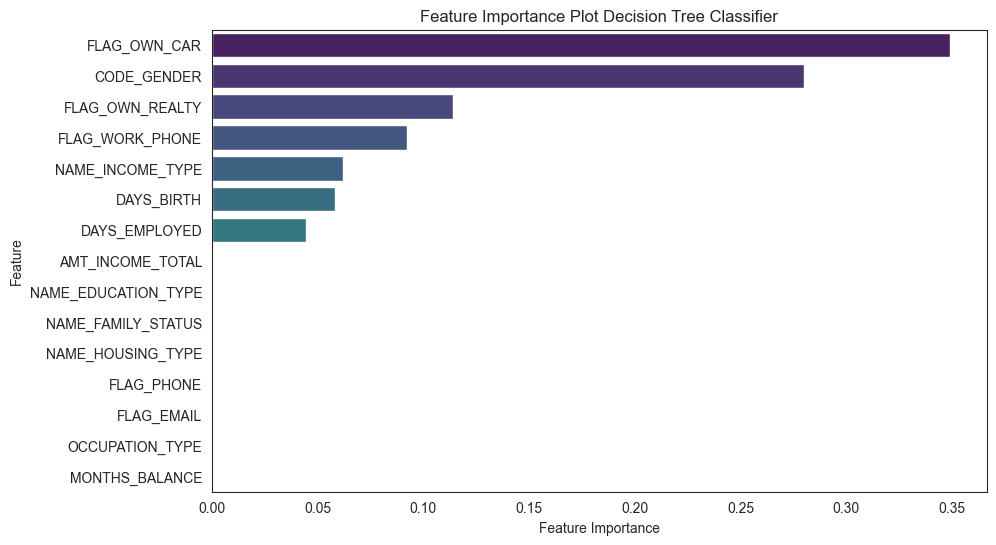

In [102]:
feat_importances = model_dt.feature_importances_
col = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis=1)
# Create a pandas Series with feature importances
feat_importances_series = pd.Series(feat_importances, index=col.columns)

# Sort feature importances in descending order
feat_importances_series = feat_importances_series.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances_series.values, y=feat_importances_series.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot Decision Tree Classifier')
plt.show()

Due to the low depth value, the model only takes few features to predict the STATUS value.

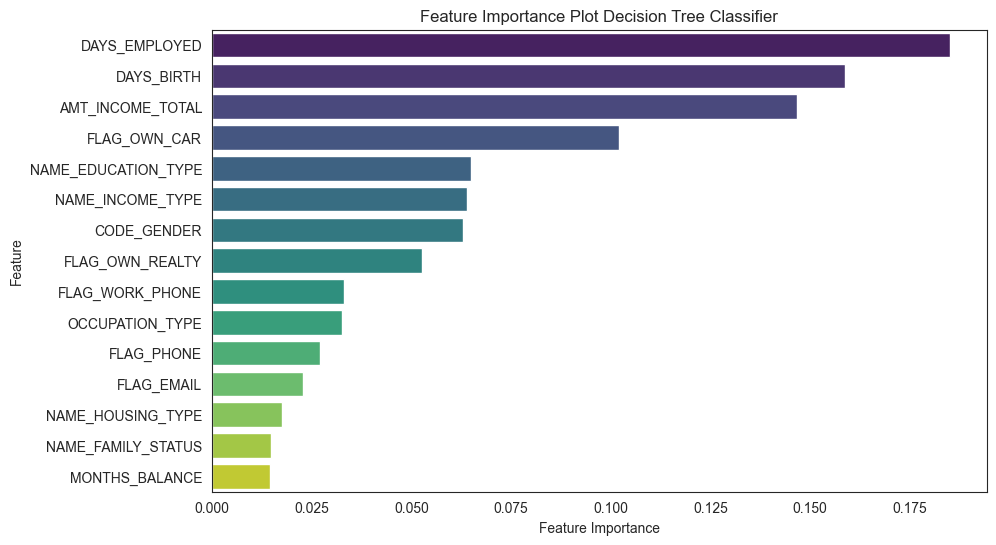

In [33]:
feat_importances = model_dt_8.feature_importances_
col = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis=1)
# Create a pandas Series with feature importances
feat_importances_series = pd.Series(feat_importances, index=col.columns)

# Sort feature importances in descending order
feat_importances_series = feat_importances_series.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances_series.values, y=feat_importances_series.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot Decision Tree Classifier')
plt.show()

In the second case, the model takes all the features to predict STATUS value

<div id="7" style="background-color: #BCEFC6; padding: 20px; border-radius: 70px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   7. Interpreting the whitebox model
    </h1>
</div>

### Visualize the tree

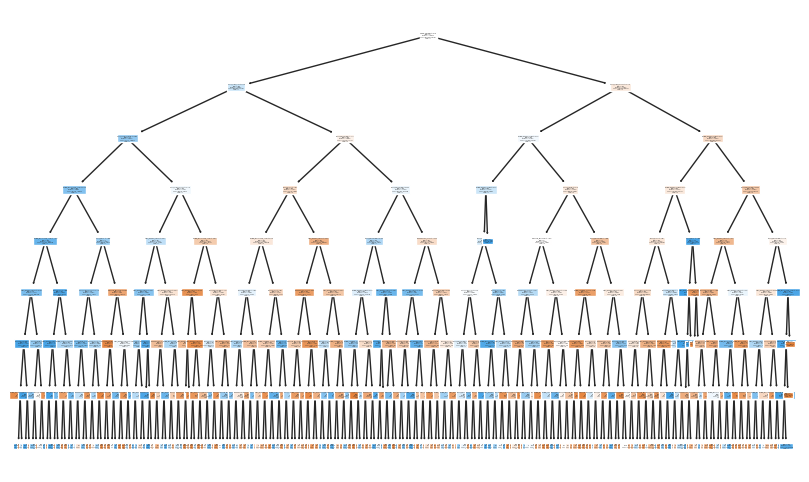

In [16]:

# max_depth = 8 in training
plt.figure(figsize=(10, 6))
col = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis=1)
plot_tree(model_dt, filled=True, feature_names=col.columns, class_names=['0', '1'])
# save the plot
plt.savefig('decision_tree.png')
plt.show()


In [ ]:
cols = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis=1).columns
n_nodes = model_dt_8.tree_.node_count
children_left = model_dt_8.tree_.children_left
children_right = model_dt_8.tree_.children_right
feature = model_dt_8.tree_.feature 
threshold = model_dt_8.tree_.threshold
values = model_dt_8.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=cols[feature[i]],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

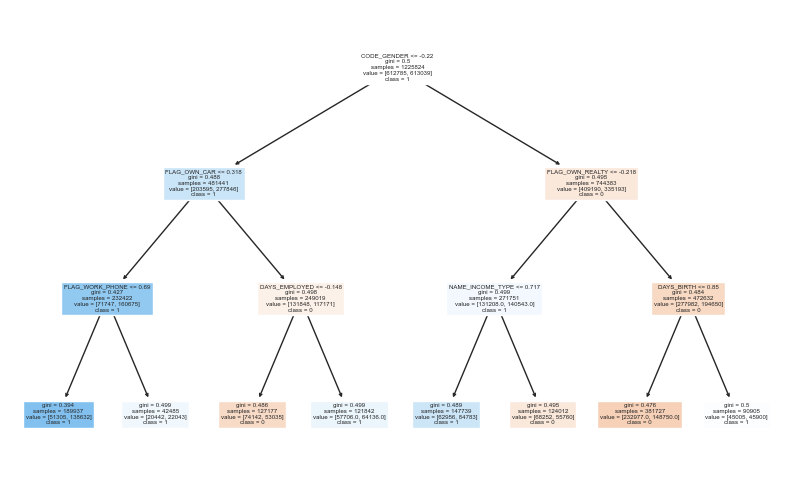

In [103]:
# max depth = 3
plt.figure(figsize=(10, 6))
col = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis=1)
plot_tree(model_dt, filled=True, feature_names=col.columns, class_names=['0', '1'], )
plt.show()
# 0- good debt
# 1- bad debt

### max depth = 3

From the top node two branches emerge.

From each branch further divides into 2 nodes with additional labels. 
 - FLAG_OWN_CAR and FLAG_OWN_REALITY, each of these divided into 2-2 nodes. 
  - FLAG_WORK_PHONE - DAYS_EMPLOYED and NAME_INCOME_TYPE - DAYS_BIRTH, each of these divided into 2-2 nodes. 

- The color coding of the nodes adds another layer of information: blue-male related, orange-female related
- The last nodes represent the final decision about the STATUS - 0 or 1
- The samples refers to the number of data samples in the current node.
- The Gini index will always be between [0, 0.5], where 0 is a selection that perfectly splits each class in your dataset (pure), and - 0.5 means that neither of the classes was correctly classified (impure). In this case it is mostly near to 0.5

### max depth = 8

Details about the tree: tree.txt

Summary about the tree:
- the tree contains 447 nodes
- the gini index higher if the node is closer to the topnode
- non-uniform, at which level the gini index approaches zero

#### Decision path on a sample (100 and 15):

In [38]:
cols = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis=1).columns
node_indicator = model_dt_8.decision_path(X_test)
leaf_id = model_dt_8.apply(X_test)

sample_id = 100
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=cols[feature[node_id]],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 100:

decision node 0 : (X_test[100, CODE_GENDER] = 0.8036065688599157) > -0.22039172053337097)
decision node 250 : (X_test[100, FLAG_OWN_REALTY] = -1.2424867377968498) <= -0.218824565410614)
decision node 251 : (X_test[100, NAME_INCOME_TYPE] = -1.3769574319404396) <= 0.7183824181556702)
decision node 252 : (X_test[100, NAME_INCOME_TYPE] = -1.3769574319404396) <= 0.1953890435397625)
decision node 253 : (X_test[100, DAYS_BIRTH] = -0.4919431564893894) <= 0.5043643712997437)
decision node 254 : (X_test[100, FLAG_OWN_CAR] = 1.3674091108918789) > 0.3180495500564575)
decision node 262 : (X_test[100, DAYS_EMPLOYED] = -1.9431044492796201) <= -1.5221242308616638)
decision node 263 : (X_test[100, DAYS_BIRTH] = -0.4919431564893894) > -0.49789585173130035)


In [43]:
sample_id = 15
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=cols[feature[node_id]],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 15:

decision node 0 : (X_test[15, CODE_GENDER] = 0.8036065688599157) > -0.22039172053337097)
decision node 250 : (X_test[15, FLAG_OWN_REALTY] = -1.2424867377968498) <= -0.218824565410614)
decision node 251 : (X_test[15, NAME_INCOME_TYPE] = 0.9701085941828618) > 0.7183824181556702)
decision node 285 : (X_test[15, FLAG_PHONE] = -0.6099982499939941) <= 0.5146753787994385)
decision node 286 : (X_test[15, MONTHS_BALANCE] = -1.218885430076886) <= -1.0556910634040833)
decision node 287 : (X_test[15, OCCUPATION_TYPE] = -0.3815845084619737) > -1.4510498046875)
decision node 295 : (X_test[15, OCCUPATION_TYPE] = -0.3815845084619737) <= 1.0948917865753174)
decision node 296 : (X_test[15, NAME_FAMILY_STATUS] = 1.636178793985318) > 0.3398081287741661)


#### Common nodes the samples go through


In [44]:
sample_ids = [15,100]
# boolean array indicating the nodes both samples go through
common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)
# obtain node ids using position in array
common_node_id = np.arange(n_nodes)[common_nodes]

print(
    "\nThe following samples {samples} share the node(s) {nodes} in the tree.".format(
        samples=sample_ids, nodes=common_node_id
    )
)
print("This is {prop}% of all nodes.".format(prop=100 * len(common_node_id) / n_nodes))


The following samples [15, 100] share the node(s) [  0 250 251] in the tree.
This is 0.6711409395973155% of all nodes.


# 
<div id="8" style="background-color: #BCEFC6; padding: 20px; border-radius: 70px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   8. Explanatory methods for blackbox models (LIME & SHAP)
    </h1>
</div>

<div id="8.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   8.1 Random Forest Classifier
    </h1>
</div>
<hr>

LIME

In [133]:
col = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis=1)
rfc_explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification',
                                                       feature_names=col.columns.tolist(),
                                                       class_names=[0,1],
                                                       verbose=True)

In [139]:
exp = rfc_explainer.explain_instance(X_test[3], model.predict_proba, num_features=15, top_labels=1)

Intercept 0.9992288311211093
Prediction_local [0.57643155]
Right: 1.0


In [140]:
exp.show_in_notebook(show_all=True)

In [141]:
exp = rfc_explainer.explain_instance(X_test[100], model.predict_proba, num_features=15, top_labels=1)

Intercept 0.02544291321345865
Prediction_local [0.42379675]
Right: 1.0


In [142]:
exp.show_in_notebook(show_all=True)

the final output in the form of class probabilities (on the left), and the impact of individual features on the right and in the center. Features marked in blue moved the output in the direction of "good debt", while features marked orange moved the output towards the "bad debt" class.

### SHAP 

In [29]:
import shap
# compute SHAP values
explainer = shap.TreeExplainer(model)


In [ ]:
# create a row of data
columns = X.columns
data = X_test[:100]
# convert the data to a pandas dataframe
test_data = pd.DataFrame(data, columns=columns)


In [ ]:
# Calculate Shap values
shap_values = explainer.shap_values(test_data)

In [ ]:

# example data 
index_to_explain = 2
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[index_to_explain, :, 1], test_data.iloc[index_to_explain, :])

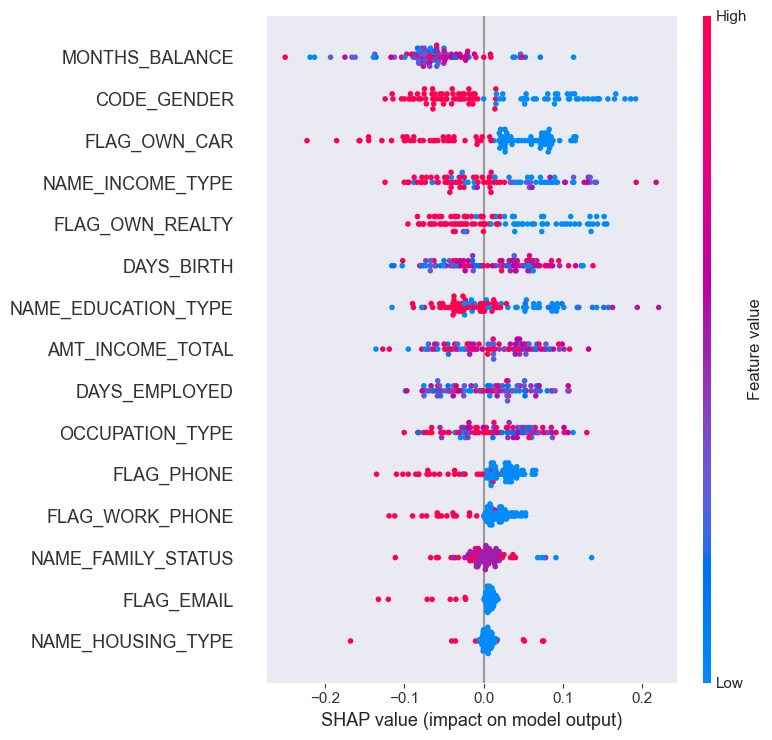

In [19]:
shap.summary_plot(shap_values[:, :, 1], test_data.iloc[:200, :], feature_names=test_data.columns)

In [21]:
# first 200 rows
shap.force_plot(
    explainer.expected_value[1], shap_values[:100, :, 1], test_data.iloc[:100, :]
)

The most important features in case of first observation:

- DAYS_BIRTH
- DAYS_EMPLOYED
- CODE_GENDER

<div id="8.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #578B61; font-weight: bold; font-size: 36px;">
   8.2 XGBoost
    </h1>
</div>
<hr>

### LIME

In [38]:
col = df_merged.drop(['CNT_CHILDREN','DAYS_BIRTH_YEAR','STATUS', 'CNT_FAM_MEMBERS','ID'], axis=1)
rfc_explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification',
                                                       feature_names=col.columns.tolist(),
                                                       class_names=[0,1],
                                                       verbose=True)

In [39]:
exp = rfc_explainer.explain_instance(X_test[2], model2.predict_proba, num_features=15, top_labels=1)

Intercept 0.49210567124122306
Prediction_local [0.18404756]
Right: 0.94446605


In [40]:
exp.show_in_notebook(show_all=True)

In [41]:
exp = rfc_explainer.explain_instance(X_test[100], model2.predict_proba, num_features=15, top_labels=1)

Intercept 0.6580860976000276
Prediction_local [0.49138797]
Right: 0.9613711


In [42]:
exp.show_in_notebook(show_all=True)

### SHAP 

In [13]:
import shap

In [14]:
# create a row of data
columns = X.columns
data = X_test[:100]
# convert the data to a pandas dataframe
test_data = pd.DataFrame(data, columns=columns)

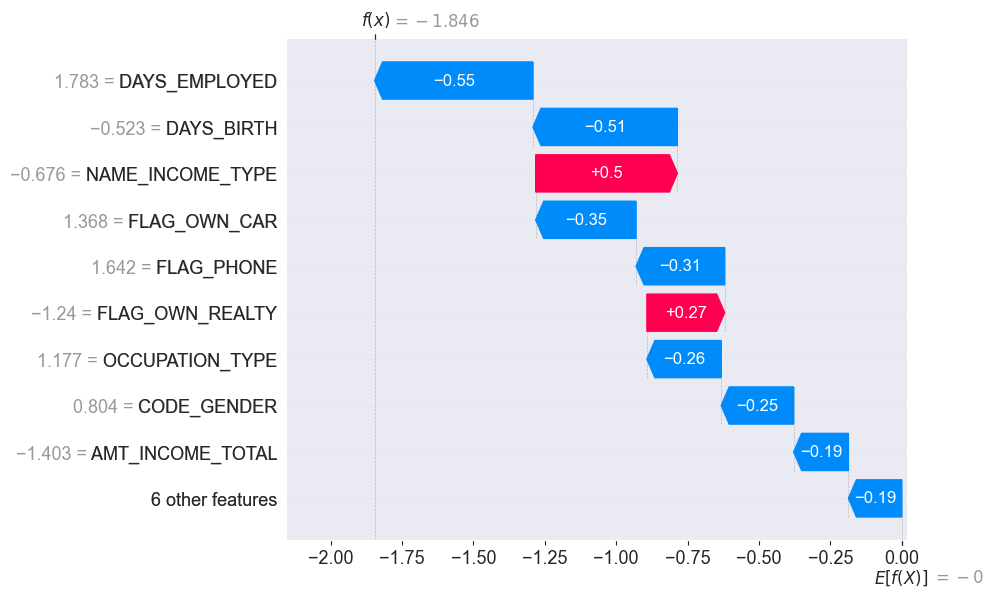

In [26]:
explainer = shap.Explainer(model2)
shap_values = explainer(test_data)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [27]:
shap.plots.force(shap_values[0])

In [28]:
#  test_data - 100 row
shap.plots.force(shap_values[:])

Each feature’s SHAP value indicates how much it contributes to the model’s output for a specific instance.

Positive SHAP values increase the model’s prediction, while negative values decrease it.

The colors indicate whether that feature is high (red) or low (blue) for that observation.

The most important features in case of first observation:

- DAYS_EMPLOYED
- DAYS_BIRTH
- NAME_INCOME_TYPE

<div id="9" style="background-color: #BCEFC6; padding: 20px; border-radius: 70px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   10. Summary
    </h1>
</div>

The blackbox models reached better performance compared to the whitebox model
- Decision Tree accuracy 69%
- Random Forest Regressor accuracy 97%
- XGBoost accuracy 89% 

The most important features, which affect the predictions

- Decision Tree: DAYS_EMPLOYED, DAYS_BIRTH, AMT_INCOME_TOTAL (global)
- In case of the blackbox models no features which always equally affect the predictions

Random Forest vs. Decision Tree

Random Forest:

- Ensemble of multiple decision trees
- Less interpretable due to ensemble nature.
- Since overall average is taken due to ensemble, it is more stable to change.
- performs well on large datasets.
- Do not provide feature score directly

Decision Tree:

- Single Decision Tree
- Highly interpretable
- It becomes quite sensitive to variation in data.
- perform well on small and large dataset as well.
- Provide feature score directly which are less reliable.